In [11]:
import pandas as pd
# Import SQL Alchemy
from sqlalchemy import create_engine
from config import sqlpass
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [6]:
dbConnectionString = "postgres://postgres:{}@ajishra.us:781/mystery".format(sqlpass)

In [7]:
# Create Database Connection
# ----------------------------------
# Establish Connection
engine = create_engine(dbConnectionString)
dbconn = engine.connect()

In [9]:
salaries=pd.read_sql_query('''select emp_no as "Employee Number", salary as "Salary" from salaries''',dbconn)

In [10]:
salaries

,Employee Number,Salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
199995,299971,40000
199996,299972,84832
199997,299973,63007
199998,299974,40000


'99999'

(array([3.0000e+00, 2.0000e+01, 9.8000e+01, 3.0700e+02, 9.0900e+02,
        2.3700e+03, 4.6700e+03, 8.5420e+03, 1.2547e+04, 1.5780e+04,
        1.6569e+04, 1.4641e+04, 1.0904e+04, 6.7190e+03, 3.5740e+03,
        1.5370e+03, 5.8200e+02, 1.7600e+02, 4.2000e+01, 9.0000e+00]),
 array([0.34694858, 0.80009102, 1.25323347, 1.70637591, 2.15951835,
        2.6126608 , 3.06580324, 3.51894568, 3.97208813, 4.42523057,
        4.87837302, 5.33151546, 5.7846579 , 6.23780035, 6.69094279,
        7.14408524, 7.59722768, 8.05037012, 8.50351257, 8.95665501,
        9.40979745]),
 <a list of 20 Patch objects>)

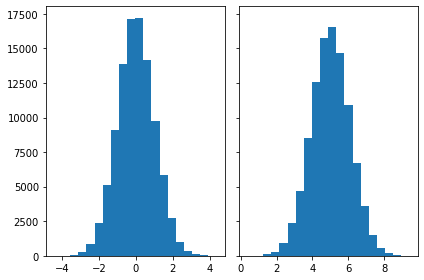

In [17]:
#Create a histogram to visualize the most common salary ranges for employees.

N_points = int(max(salaries["Salary"]))
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

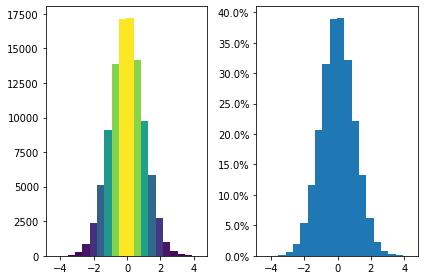

In [18]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [32]:
#Create a bar chart of average salary by title.
SalaryByTitle=pd.read_sql_query('''select t.emp_no as "EmployeeNo",t.title as "Title",s.salary as "Salary" 
from titles t join salaries s on t.emp_no=s.emp_no''',dbconn)

In [36]:
TitleGroup=SalaryByTitle.Title.unique()
TitleGroup

array(['Senior Engineer', 'Engineer', 'Staff', 'Technique Leader',
       'Assistant Engineer', 'Senior Staff', 'Manager'], dtype=object)